<a href="https://colab.research.google.com/github/danjor667/formative_II_water_quality/blob/master/Peer_6_Formative_II_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
!pip install tensorflow

In [30]:
# Importations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [3]:
# Loading the data
data_csv = 'water_potability.csv'
df = pd.read_csv(data_csv)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


filling NAN values with the corresponding mean

In [5]:
df = df.fillna(df.mean())

In [6]:
# generate 2d classification dataset
X = df.drop('Potability', axis=1)
Y = df['Potability']

In [7]:
# Splitting the data into: training, validation and testing data
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("Training data shape:", X_train.shape, Y_train.shape)
print("Validation data shape:", X_val.shape, Y_val.shape)
print("Test data shape:", X_test.shape, Y_test.shape)

Training data shape: (2293, 9) (2293,)
Validation data shape: (491, 9) (491,)
Test data shape: (492, 9) (492,)


In [8]:
print("NaN in X_train:", np.isnan(X_train).sum())
print("Inf in X_train:", np.isinf(X_train).sum())

NaN in X_train: ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64
Inf in X_train: ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


In [9]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Each Memeber Defines their model Here

## model defined by Jordan Nguepi


In [27]:
# Jordan Nguepi

def model_Jordan_Nguepi():
  """
  will be applying 3 regulirazation technique for a more robust model

  L1/L2 Regularization, Dropout, and Batch Normalization
  """
  input_dim = X_train.shape[1]

  jordan_model = Sequential([
      layers.Dense(256,
                   activation='relu',
                   input_shape=(input_dim,),
                   kernel_regularizer=regularizers.l2(0.01)),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(128, activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])
  # using the adam optimizer

  jordan_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])
  jordan_model.summary()

  return jordan_model


### starting training

In [28]:
jordan_model = model_Jordan_Nguepi()

history = jordan_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 44,673 (174.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5233 - loss: 3.6303 - val_accuracy: 0.6314 - val_loss: 3.0180
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5517 - loss: 3.1482 - val_accuracy: 0.6314 - val_loss: 2.7266
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5845 - loss: 2.7847 - val_accuracy: 0.6334 - val_loss: 2.4491
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5781 - loss: 2.4896 - val_accuracy: 0.6395 - val_loss: 2.1987
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5701 - loss: 2.2606 - val_accuracy: 0.6538 - val_loss: 1.9767
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6107 - loss: 1.9978 - val_accuracy: 0.6660 - val_loss: 1.7759
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6187 - loss: 1.8055 - val_accuracy: 0.6741 - val_loss: 1.5992
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6121 - loss: 1.6327 - val_accuracy: 0.6782 - 

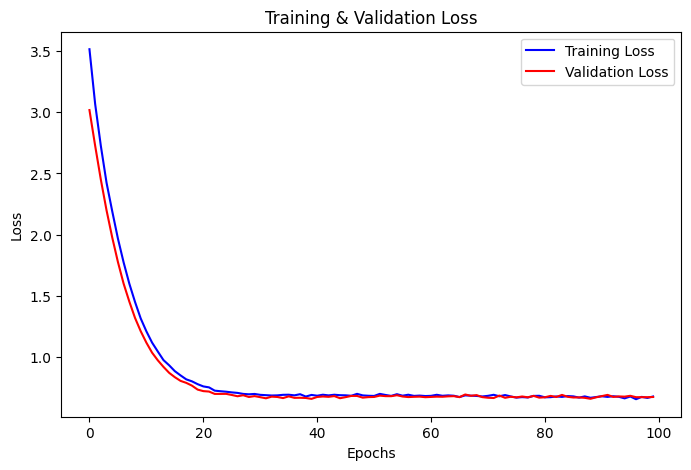

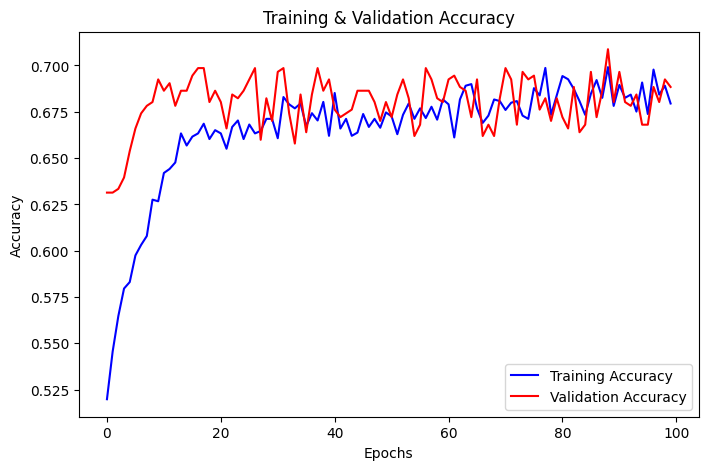

In [31]:
# Visualising all that

def plot_loss(history):
    """Plots Training & Validation Loss."""
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.show()


def plot_accuracy(history):
    """Plots Training & Validation Accuracy."""
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()
    plt.show()


def plot_confusion_matrix(y_true, y_pred):
    """Plots a Confusion Matrix."""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


plot_loss(history)
plot_accuracy(history)
#plot_confusion_matrix(Y_test, jordan_model.predict_classes(X_test))

In [37]:
# Evaluation of the Precision, Recall and F1-Score
Y_pred = jordan_model.predict(X_test)
y = (Y_pred > 0.45).astype(int)
print(classification_report(Y_test, y))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       307
           1       0.65      0.41      0.50       185

    accuracy                           0.69       492
   macro avg       0.68      0.64      0.64       492
weighted avg       0.68      0.69      0.67       492



## model defined by Anissa OUEDRAOGO

#Model training

In [15]:
#Model Definition by Anissa OUEDRAOGO
"""
 Will be using L2 Regularization optimised with Stochastic Gradient Descent (SGD)
 """
def model_AnissaOUEDRAOGO():
  from tensorflow import keras # This line is adding the missing import
  from tensorflow.keras import layers

  # Define the model architecture
  model = keras.Sequential([
      layers.Input(shape=(9,)), # Assuming input_shape is 9 based on the dataset
      layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # L2 regularization
      layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
      layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification, output layer should have 1 unit
  ])

  # Compile the model
  model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

  return model # Return the compiled model

In [16]:
from tensorflow import keras  # Import keras at the beginning of the cell

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [19]:
# Train the model
# Call the model function and assign the result to the variable 'model'
model_Anissa = model_AnissaOUEDRAOGO()  # This line is added

history = model_Anissa.fit(X_train, Y_train, # Change y_train to Y_train to match previous usage
                    validation_data=(X_val, Y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5440 - loss: 1.2612 - val_accuracy: 0.6375 - val_loss: 1.1176
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6047 - loss: 1.0936 - val_accuracy: 0.6477 - val_loss: 0.9942
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6225 - loss: 0.9740 - val_accuracy: 0.6497 - val_loss: 0.9057
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6188 - loss: 0.8960 - val_accuracy: 0.6517 - val_loss: 0.8378
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6219 - loss: 0.8364 - val_accuracy: 0.6456 - val_loss: 0.7879
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6211 - loss: 0.7948 - val_accuracy: 0.6538 - val_loss: 0.7479
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6443 - loss: 0.7449 - val_accuracy: 0.6640 - val_loss: 0.7196
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6493 - loss: 0.7251 - val_accuracy: 0.6864 - v

#Model evaluation

In [26]:
# Evaluation of the Precision, Recall and F1-Score
Y_pred = model_Anissa.predict(X_test)
y_p = (Y_pred > 0.45).astype(int)
print(classification_report(Y_test, y_p))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       307
           1       0.67      0.33      0.44       185

    accuracy                           0.69       492
   macro avg       0.68      0.62      0.61       492
weighted avg       0.68      0.69      0.65       492



#Let's visualize this

In [ ]:
def plot_loss(history):
    """Plots Training & Validation Loss."""
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.show()


def plot_accuracy(history):
    """Plots Training & Validation Accuracy."""
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()
    plt.show()


def plot_confusion_matrix(y_true, y_pred):
    """Plots a Confusion Matrix."""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


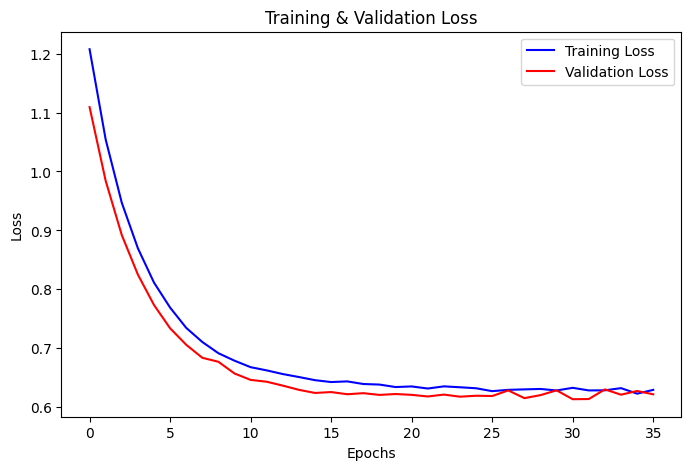

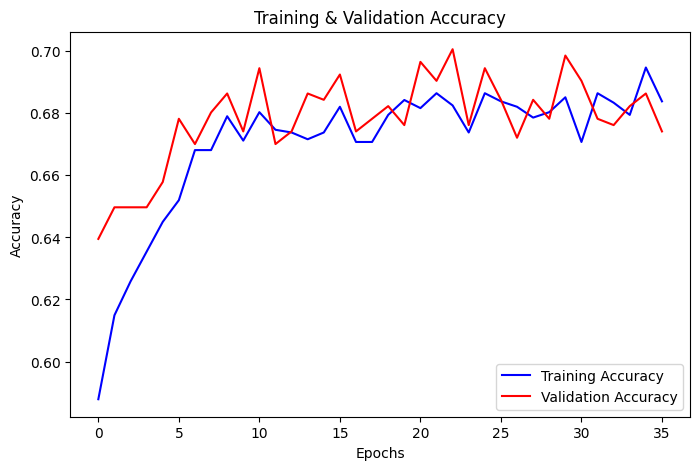

In [ ]:
plot_loss(history)
plot_accuracy(history)


## model defined by Jamillah SSOZI

In [42]:
#Model Definition by Jamillah SSOZI
def model_Jamillah_Ssozi():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01))) # Hidden layer 1
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))) # Hidden layer 2
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01))) # Hidden layer 3
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01))) # Hidden layer 4
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(8, activation='relu')) # Hidden layer 5
  model.add(Dropout(0.2))
  model.add(Dense(4, activation='relu')) # Hidden layer 6
  model.add(Dense(1, activation='sigmoid')) # Output layer

  # Compiling the model
  optimizer = RMSprop(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Start the training Process

In [43]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Training the model
model = model_Jamillah_Ssozi()
history = model.fit(X_train, Y_train, epochs=1000, batch_size=64, validation_data=(X_val, Y_val), callbacks=[early_stopping])

# Evaluating the model
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4633 - loss: 2.3796 - val_accuracy: 0.6293 - val_loss: 2.1256
Epoch 2/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5225 - loss: 2.1271 - val_accuracy: 0.6314 - val_loss: 1.9601
Epoch 3/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5610 - loss: 1.9455 - val_accuracy: 0.6314 - val_loss: 1.7964
Epoch 4/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5788 - loss: 1.7744 - val_accuracy: 0.6314 - val_loss: 1.6452
Epoch 5/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5878 - loss: 1.6188 - val_accuracy: 0.6314 - val_loss: 1.5100
Epoch 6/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5762 - loss: 1.4857 - val_accuracy: 0.6314 - val_loss: 1.3859
Epoch 7/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5825 - loss: 1.3682 - val_accuracy: 0.6314 - val_loss: 1.2828
Epoch 8/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6022 - loss: 1.2657 - val_accuracy

In [44]:
# Evaluation of the Precision, Recall and F1-Score
Y_pred = model.predict(X_test)
y_pred = (Y_pred > 0.45).astype(int)
print(classification_report(Y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       307
           1       0.67      0.36      0.46       185

    accuracy                           0.69       492
   macro avg       0.68      0.62      0.62       492
weighted avg       0.69      0.69      0.66       492



In [45]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,084 (101.89 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 480 (1.88 KB)

 Optimizer params: 12,803 (50.02 KB)

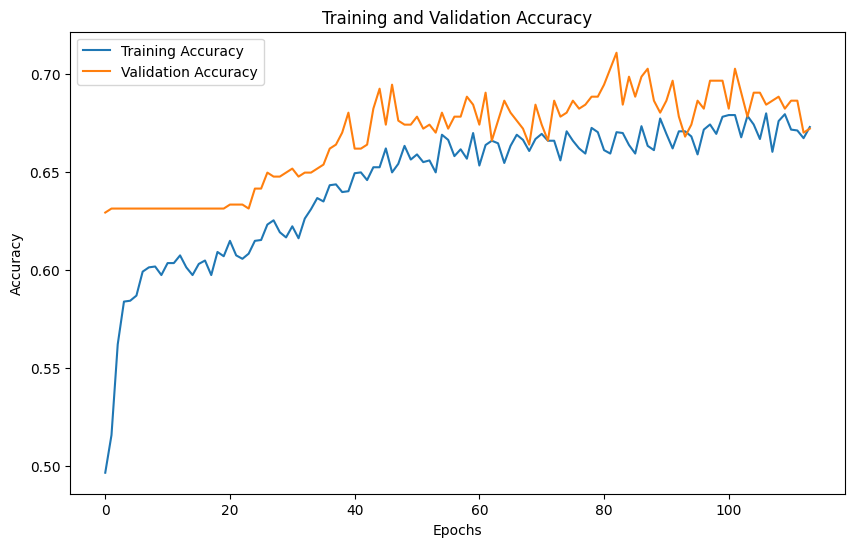

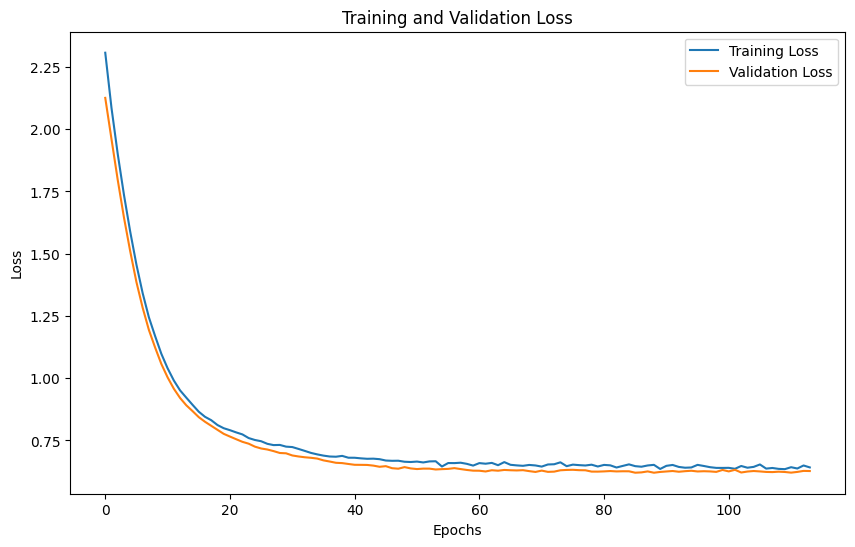

In [46]:
# Extracting the accuracy and loss values
train_acc_history = history.history['accuracy']
val_acc_history = history.history['val_accuracy']
train_loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Summary TODO

In [ ]:
# TODO

"""
conclusion

which model is better?
Why?
why we chosed the optimizer we chose? why the number of hidden layer we chosed
why the regulirization we chosed?
"""

## different models can be saved here.... with different names though

'\nconclusion\n\nwhich model is better?\nWhy?\nwhy we chosed the optimizer we chose? why the number of hidden layer we chosed\nwhy the regulirization we chosed?\n'